In [103]:
import numpy as np
float_formatter = lambda x: '%.5f' % x
np.set_printoptions(formatter={'float_kind':float_formatter})
from sklearn.cluster import OPTICS, cluster_optics_dbscan
from matplotlib import pyplot as plt
import seaborn as sns
import matplotlib.gridspec as gridspec
sns.set()

In [78]:
np.random.seed(0)
n_points_per_cluster = 250

# random.randn(d1, d2... dn)
# 250 x 2 matrix of randomly generated numbers
C1 = [-5, -2] + .8 * np.random.randn(n_points_per_cluster, 2)
C2 = [4, -1] + .1 * np.random.randn(n_points_per_cluster, 2)
C3 = [1, -2] + .2 * np.random.randn(n_points_per_cluster, 2)
C4 = [-2, 3] + .3 * np.random.randn(n_points_per_cluster, 2)
C5 = [3, -2] + 1.6 * np.random.randn(n_points_per_cluster, 2)
C6 = [5, 6] + 2 * np.random.randn(n_points_per_cluster, 2)

# Stacks arrays (row wise)
X = np.vstack((C1, C2, C3, C4, C5, C6))

In [79]:
clust = OPTICS(min_samples=50, xi=.05, min_cluster_size=.05)

clust.fit(X)

OPTICS(algorithm='auto', cluster_method='xi', eps=None, leaf_size=30,
       max_eps=inf, metric='minkowski', metric_params=None,
       min_cluster_size=0.05, min_samples=50, n_jobs=None, p=2,
       predecessor_correction=True, xi=0.05)

In [80]:
labels_eps_05 = cluster_optics_dbscan(
    reachability=clust.reachability_,
    core_distances=clust.core_distances_,
    ordering=clust.ordering_,
    eps=0.5
)

labels_eps_20 = cluster_optics_dbscan(
    reachability=clust.reachability_,
    core_distances=clust.core_distances_,
    ordering=clust.ordering_,
    eps=2.0
)

In [81]:
space = np.arange(len(X))
reachability = clust.reachability_[clust.ordering_]
labels = clust.labels_[clust.ordering_]

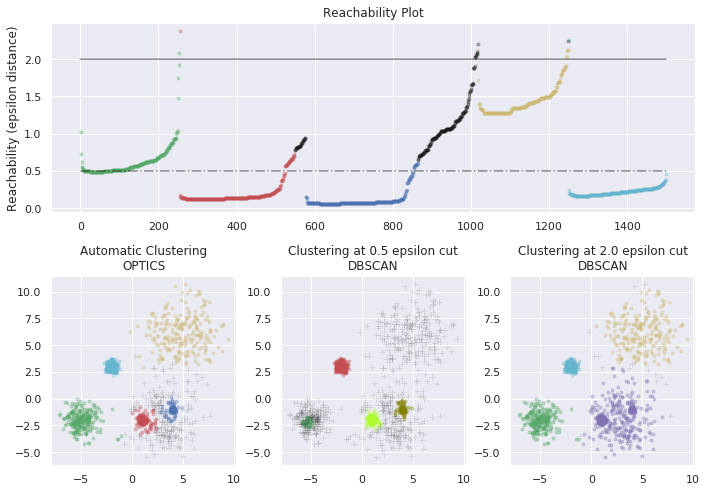

In [102]:
plt.figure(figsize=(10, 7))
# specifies the shape of the grid (affects where subplots are placed)
# GridSpec(nrows, ncols)
G = gridspec.GridSpec(2, 3)
# first subplot will take up entire first row
ax1 = plt.subplot(G[0, :])
# the remaining subplots will each take up one column in the second row
ax2 = plt.subplot(G[1, 0])
ax3 = plt.subplot(G[1, 1])
ax4 = plt.subplot(G[1, 2])

# Reachability plot
colors = ['g.', 'r.', 'b.', 'y.', 'c.']
for klass, color in zip(range(0, 5), colors):
    Xk = space[labels == klass]
    Rk = reachability[labels == klass]
    ax1.plot(Xk, Rk, color, alpha=0.3)
ax1.plot(space[labels == -1], reachability[labels == -1], 'k.', alpha=0.3)
# full_like(array, fill_value, dtype)
# returns a new array with the same shape as the array where each elements is equal to fill_value
ax1.plot(space, np.full_like(space, 2., dtype=float), 'k-', alpha=0.5)
ax1.plot(space, np.full_like(space, 0.5, dtype=float), 'k-.', alpha=0.5)
ax1.set_ylabel('Reachability (epsilon distance)')
ax1.set_title('Reachability Plot')

# OPTICS
colors = ['g.', 'r.', 'b.', 'y.', 'c.']
for klass, color in zip(range(0, 5), colors):
    # select all points (rows) which have  
    Xk = X[clust.labels_ == klass]
    ax2.plot(Xk[:, 0], Xk[:, 1], color, alpha=0.3)
# the points which are considered noise and not part of any cluster will have a label of -1
# k+ displays the points as '+'
# alpha value lowers the opacity 
ax2.plot(X[clust.labels_ == -1, 0], X[clust.labels_ == -1, 1], 'k+', alpha=0.1)
ax2.set_title('Automatic Clustering\nOPTICS')

# DBSCAN eps=0.5
colors = ['g', 'greenyellow', 'olive', 'r', 'b', 'c']
for klass, color in zip(range(0, 6), colors):
    Xk = X[labels_eps_05 == klass]
    ax3.plot(Xk[:, 0], Xk[:, 1], color, alpha=0.3, marker='.')
# the points which are considered noise and not part of any cluster will have a label of -1
# k+ displays the points as '+'
# alpha value lowers the opacity 
ax3.plot(X[labels_eps_05 == -1, 0], X[labels_eps_05 == -1, 1], 'k+', alpha=0.1)
ax3.set_title('Clustering at 0.5 epsilon cut\nDBSCAN')

# DBSCAN eps=2.0
colors = ['g.', 'm.', 'y.', 'c.']
for klass, color in zip(range(0, 4), colors):
    Xk = X[labels_eps_20 == klass]
    ax4.plot(Xk[:, 0], Xk[:, 1], color, alpha=0.3)
# the points which are considered noise and not part of any cluster will have a label of -1
# k+ displays the points as '+'
# alpha value lowers the opacity 
ax4.plot(X[labels_eps_20 == -1, 0], X[labels_eps_20 == -1, 1], 'k+', alpha=0.1)
ax4.set_title('Clustering at 2.0 epsilon cut\nDBSCAN')

# increases space between subplots
plt.tight_layout()
plt.show()